## FINE TUNING PRETRAINED NETWORK 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tds

In [41]:
!pip install tensorflow_datasets

## DATA COLLECTION AND PROCESSING

In [2]:
(raw_train,raw_validate,raw_test),metadata=tds.load('cats_vs_dogs',split=['train[:80%]','train[80%:90%]','train[90%:]'],with_info=True,as_supervised=True)

In [3]:
raw_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [43]:
get_label_name=metadata.features['label'].int2str

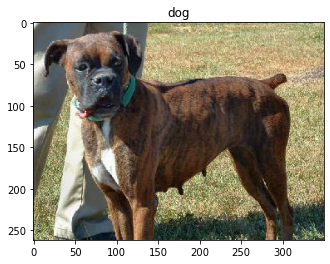

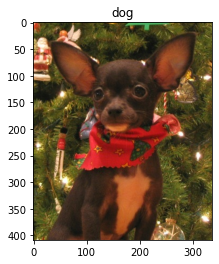

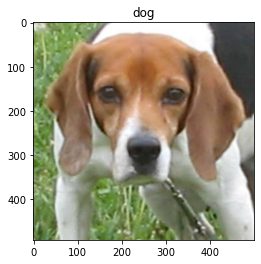

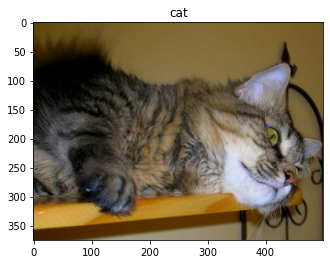

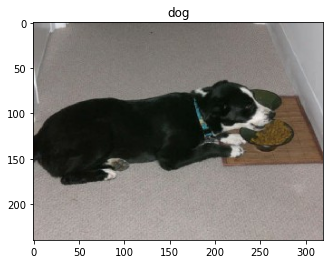

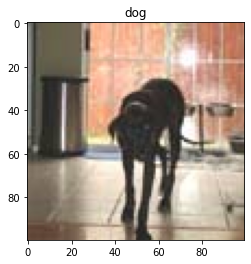

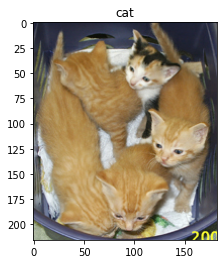

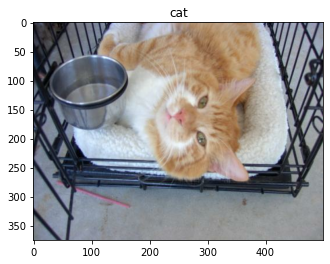

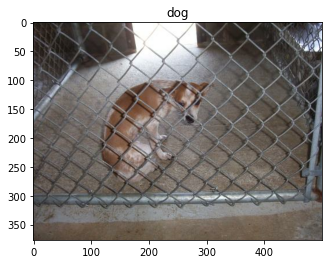

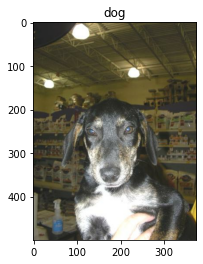

In [44]:
for image,label in raw_train.take(10):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [45]:
IMG_SIZE=160

def format_images(image,label):
    image=tf.cast(image,tf.float32)
    image=tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
    image=(image/127.5)-1
    return image,label
    

In [46]:
train=raw_train.map(format_images)
validation=raw_validate.map(format_images)
test=raw_test.map(format_images)

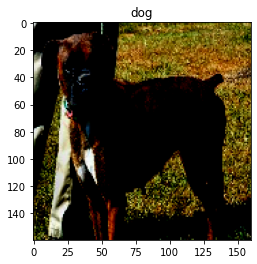

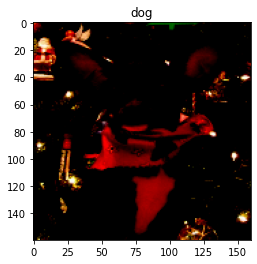

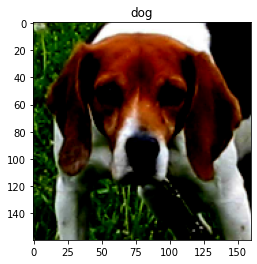

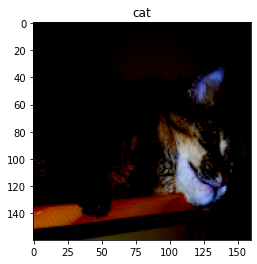

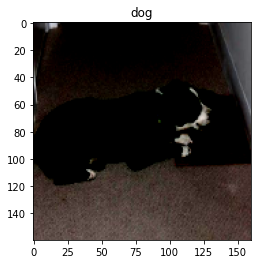

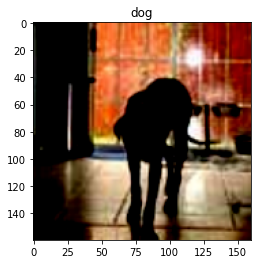

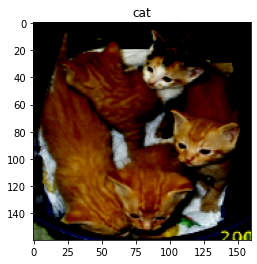

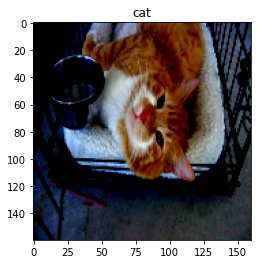

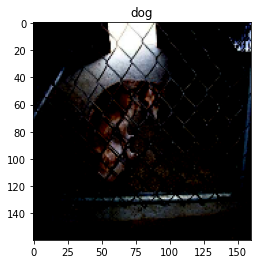

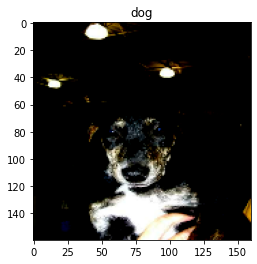

In [47]:
for image,label in train.take(10):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [48]:
BATCH_SIZE=32
SHUFFLE_SIZE=1000

In [49]:
train_batches=train.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)
validation_bathes=validation.batch(BATCH_SIZE)
test_baches=test.batch(BATCH_SIZE)

## INSTANTITAING MODEL

In [50]:
IMG_SHAPE=(IMG_SIZE,IMG_SIZE,3)
base_model=tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
base_model.summary()

9406464/9406464 [==============================] - 5s 1us/step
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 20, 20, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
          

                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 10, 10, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malizatio

 block_10_project (Conv2D)      (None, 10, 10, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_

 block_14_depthwise_BN (BatchNo  (None, 5, 5, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_

In [53]:
base_model.trainable=False

In [54]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

## ADDING CUSTOM LAYERS 

In [57]:
global_average_layer = keras.layers.GlobalAveragePooling2D()

In [58]:
prediction_layer=keras.layers.Dense(1)

In [60]:
model=keras.Sequential([base_model,global_average_layer,prediction_layer])

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [67]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## TRAINING AND EVALUATION

In [68]:
result_before_training=model.evaluate(validation_bathes)

73/73 [==============================] - 28s 362ms/step - loss: 5.9621 - accuracy: 0.3788


In [69]:
results_after_training=model.fit(train_batches,epochs=3,validation_data=validation_bathes)

Epoch 1/3
582/582 [==============================] - 251s 425ms/step - loss: 0.5230 - accuracy: 0.9433 - val_loss: 0.3222 - val_accuracy: 0.9656
Epoch 2/3
582/582 [==============================] - 247s 423ms/step - loss: 0.3479 - accuracy: 0.9670 - val_loss: 0.5276 - val_accuracy: 0.9514
Epoch 3/3
582/582 [==============================] - 223s 382ms/step - loss: 1.6883 - accuracy: 0.8764 - val_loss: 0.4972 - val_accuracy: 0.9557


In [70]:
model.save('cats_vs_dosgs.h5')
model=keras.models.load_model('cats_vs_dosgs.h5')

In [75]:
def load_and_preprocess_image(image_path):
    # Read the image file
    img = tf.io.read_file(image_path)
    
    # Decode the image (JPEG or PNG)
    img = tf.image.decode_jpeg(img, channels=3)
    
    # Resize the image to match your model's input size (e.g., IMG_SIZE)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    
    # Normalize the image to the range [-1, 1]
    img = (tf.cast(img, tf.float32) / 127.5) - 1.0
    
    return img

def predict_image_class(image_path):
    # Load and preprocess the image
    img = load_and_preprocess_image(image_path)
    
    # Expand dimensions to match the batch size (1 in this case)
    img = tf.expand_dims(img, axis=0)
    
    # Make the prediction
    prediction = model.predict(img)
    
    # Get the class label (0 for cat, 1 for dog)
    class_label = np.argmax(prediction)
    
    if class_label == 0:
        return "Cat"
    else:
        return "Dog"

image_path = 'test-cat.jpg'  # Replace with the path to the image you want to classify
predicted_class = predict_image_class(image_path)
print(f'The image is a {predicted_class}')


1/1 [==============================] - 0s 35ms/step
The image is a Cat


In [73]:
result_before_training=model.evaluate(test_baches)

73/73 [==============================] - 27s 374ms/step - loss: 0.6321 - accuracy: 0.9484
